# Import Data Frame w/ Women's Health Flag

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
full_df = pd.read_csv('/content/drive/MyDrive/final_articles_classified.csv')

Mounted at /content/drive


In [2]:
full_df.head()

,year,month,headline,lead_paragraph,news_desk,keywords,new,is_womens_health_pred,confidence_score
0,2004,1,FreeMarkets Agrees to Buy Auction Unit of Covi...,"FreeMarkets, which makes Internet-auction soft...",Business/Financial Desk,"General Motors Corp, Ford Motor Co, DaimlerChr...",FreeMarkets Agrees to Buy Auction Unit of Covi...,0,0.056229
1,2004,1,National Briefing | South: Arkansas: Assembly ...,Both houses of the General Assembly recessed u...,National Desk,NaN,National Briefing | South: Arkansas: Assembly ...,0,0.024317
2,2004,1,Clark Courts Veterans in Swing Through South,Winding up several days of campaigning in the ...,National Desk,"Southern States (US), Health Insurance and Man...",Clark Courts Veterans in Swing Through South W...,0,0.004694
3,2004,1,"Paid Notice: Deaths PAONE, NICOLA","PAONE--Nicola. On December 25, 2003 at age 88....",Classified,"PAONE, NICOLA","Paid Notice: Deaths PAONE, NICOLA PAONE--Nic...",0,0.145481
4,2004,1,The Time We Thought We Knew,"It was an unlikely place to be at 4:30 a.m., s...",Editorial Desk,"Newton, Isaac, Einstein, Albert, Time, RELATIV...",The Time We Thought We Knew It was an unlikely...,0,0.010241


# Basic Analytics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np

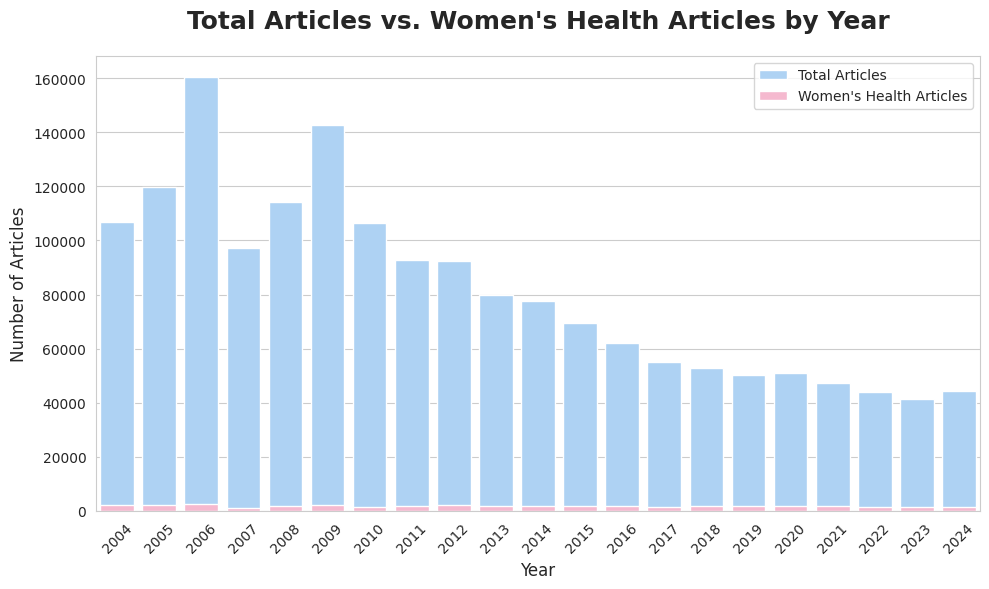

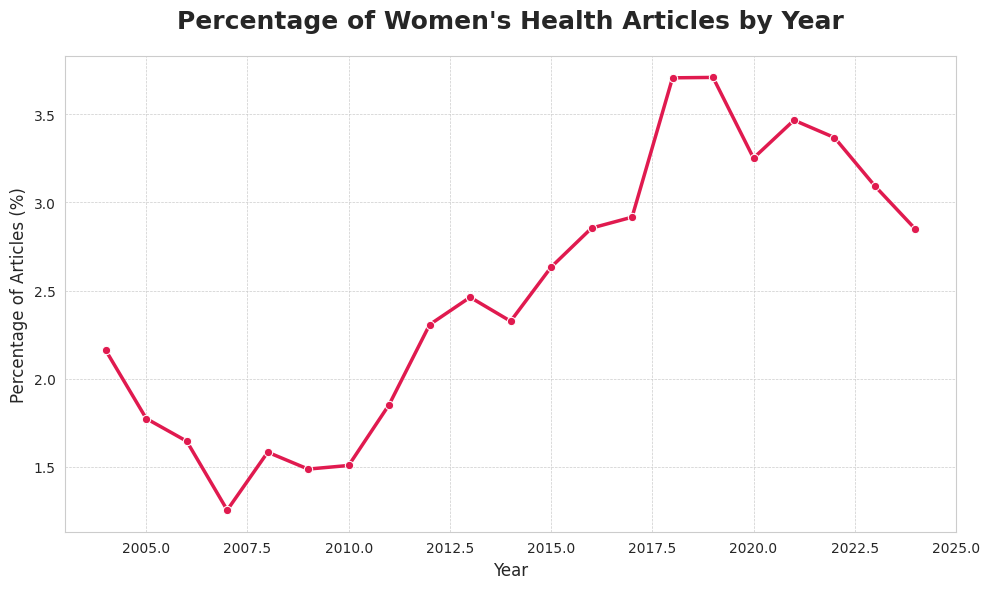

In [10]:

#Total articles per year
total_articles_per_year = full_df['year'].value_counts().sort_index().reset_index()
total_articles_per_year.columns = ['year', 'total_articles']

#Women's health articles per year
womens_health_df = full_df[full_df['is_womens_health_pred'] == 1]
womens_health_articles_per_year = womens_health_df['year'].value_counts().sort_index().reset_index()
womens_health_articles_per_year.columns = ['year', 'womens_health_articles']

#Merge
yearly_summary = pd.merge(total_articles_per_year, womens_health_articles_per_year, on='year', how='left').fillna(0)
yearly_summary['womens_health_articles'] = yearly_summary['womens_health_articles'].astype(int)

#%
yearly_summary['percentage_womens_health'] = (yearly_summary['womens_health_articles'] / yearly_summary['total_articles']) * 100

#Plots
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x='year', y='total_articles', data=yearly_summary, color='#a2d2ff', label='Total Articles', ax=ax1)
sns.barplot(x='year', y='womens_health_articles', data=yearly_summary, color='#ffafcc', label="Women's Health Articles", ax=ax1)

ax1.set_title('Total Articles vs. Women\'s Health Articles by Year', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Articles', fontsize=12)
ax1.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='percentage_womens_health', data=yearly_summary, marker='o', color='#e01a4f', linewidth=2.5)
plt.title("Percentage of Women's Health Articles by Year", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel("Percentage of Articles (%)", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


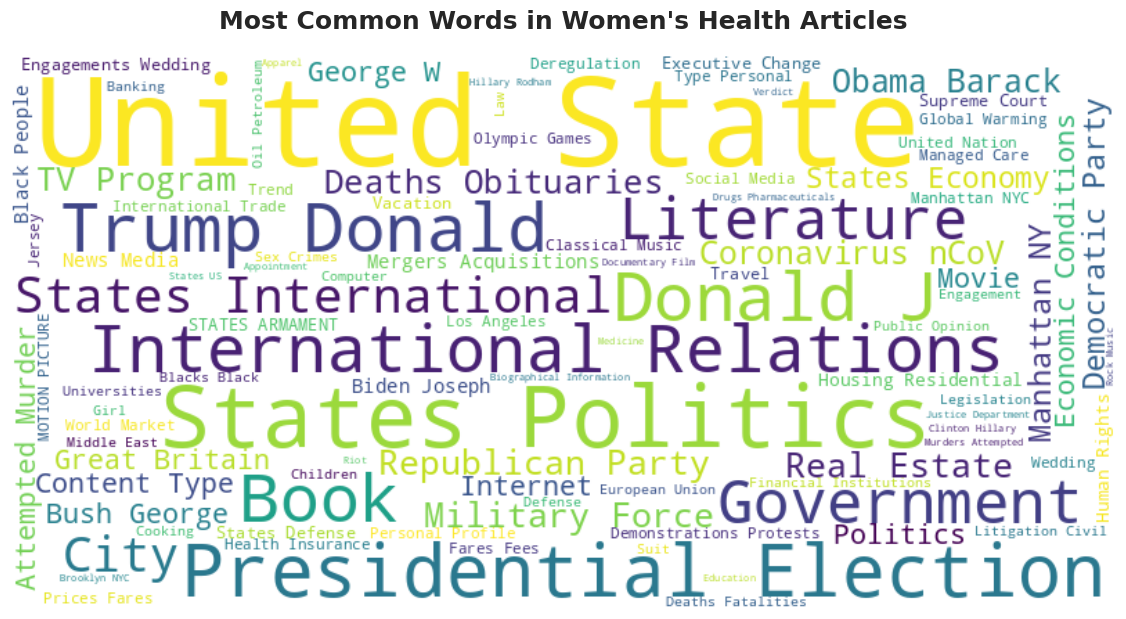

In [36]:
text = " ".join(full_df['keywords'].astype(str).dropna())
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["say", "said", "will", "new", "one","york","s","year","day","nan"])

wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color="white",
    width=800,
    height=400,
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue'
).generate(text)

#Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Women\'s Health Articles', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

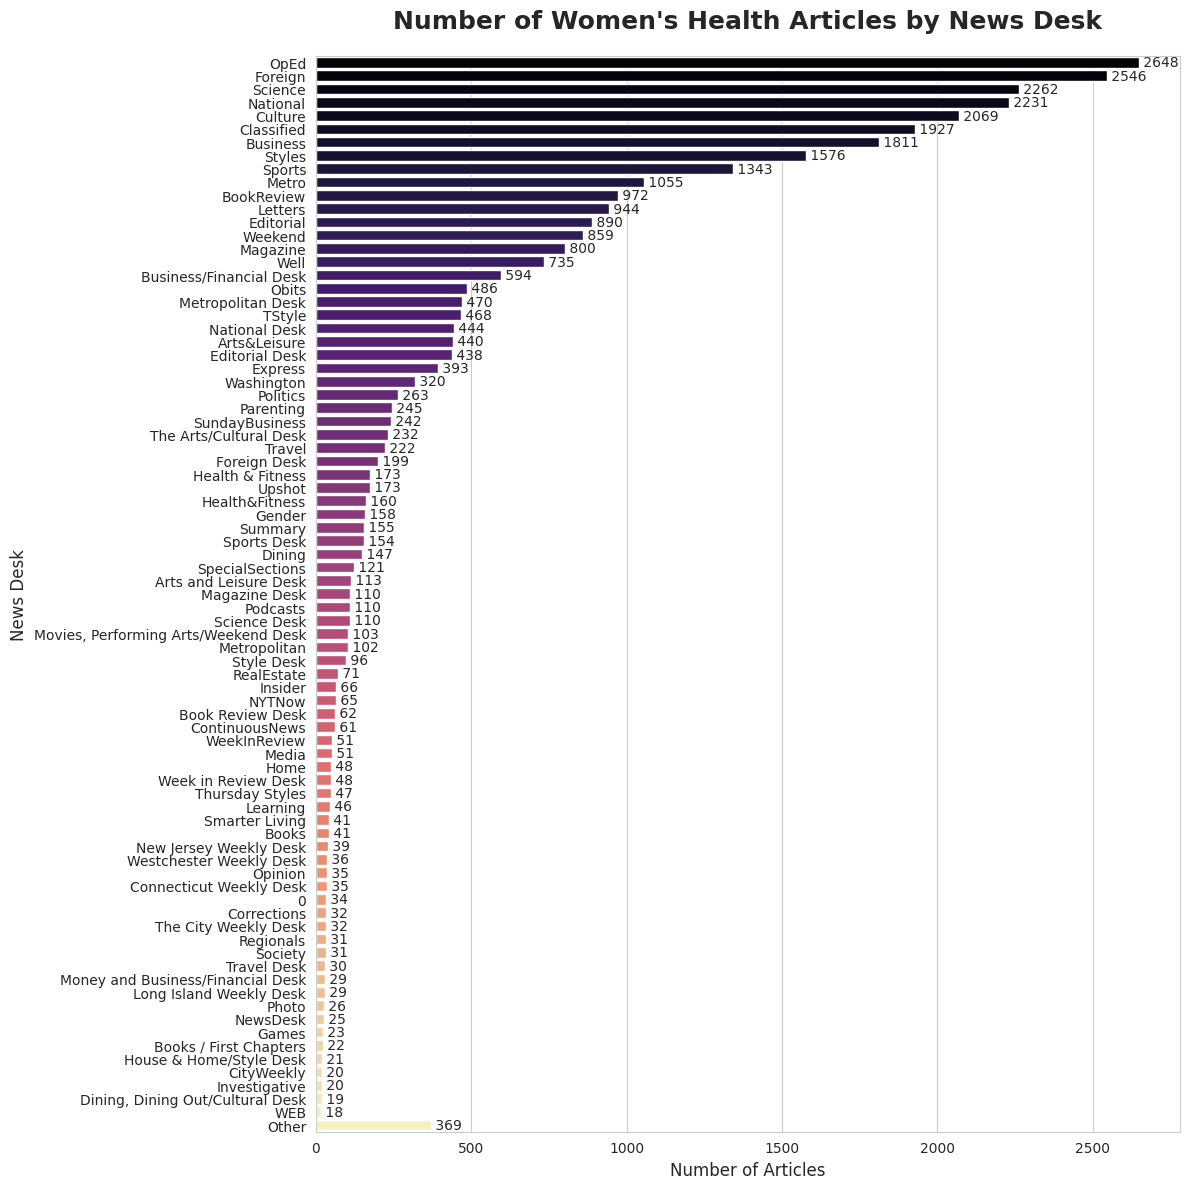

In [37]:
desk_counts = womens_health_df['news_desk'].value_counts()

top_n = 80
if len(desk_counts) > top_n:
    top_desks = desk_counts.nlargest(top_n)
    other_count = desk_counts.nsmallest(len(desk_counts) - top_n).sum()
    top_desks['Other'] = other_count
    desk_counts_to_plot = top_desks.reset_index()
else:
    desk_counts_to_plot = desk_counts.reset_index()

desk_counts_to_plot.columns = ['news_desk', 'article_count']

# Womens Article in News Desk
plt.figure(figsize=(12, 12))
sns.barplot(x='article_count', y='news_desk', data=desk_counts_to_plot, palette='magma', hue='news_desk')
plt.title('Number of Women\'s Health Articles by News Desk', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('News Desk', fontsize=12)
for index, value in enumerate(desk_counts_to_plot['article_count']):
    plt.text(value, index, f' {value}', va='center')
plt.tight_layout()
plt.show()



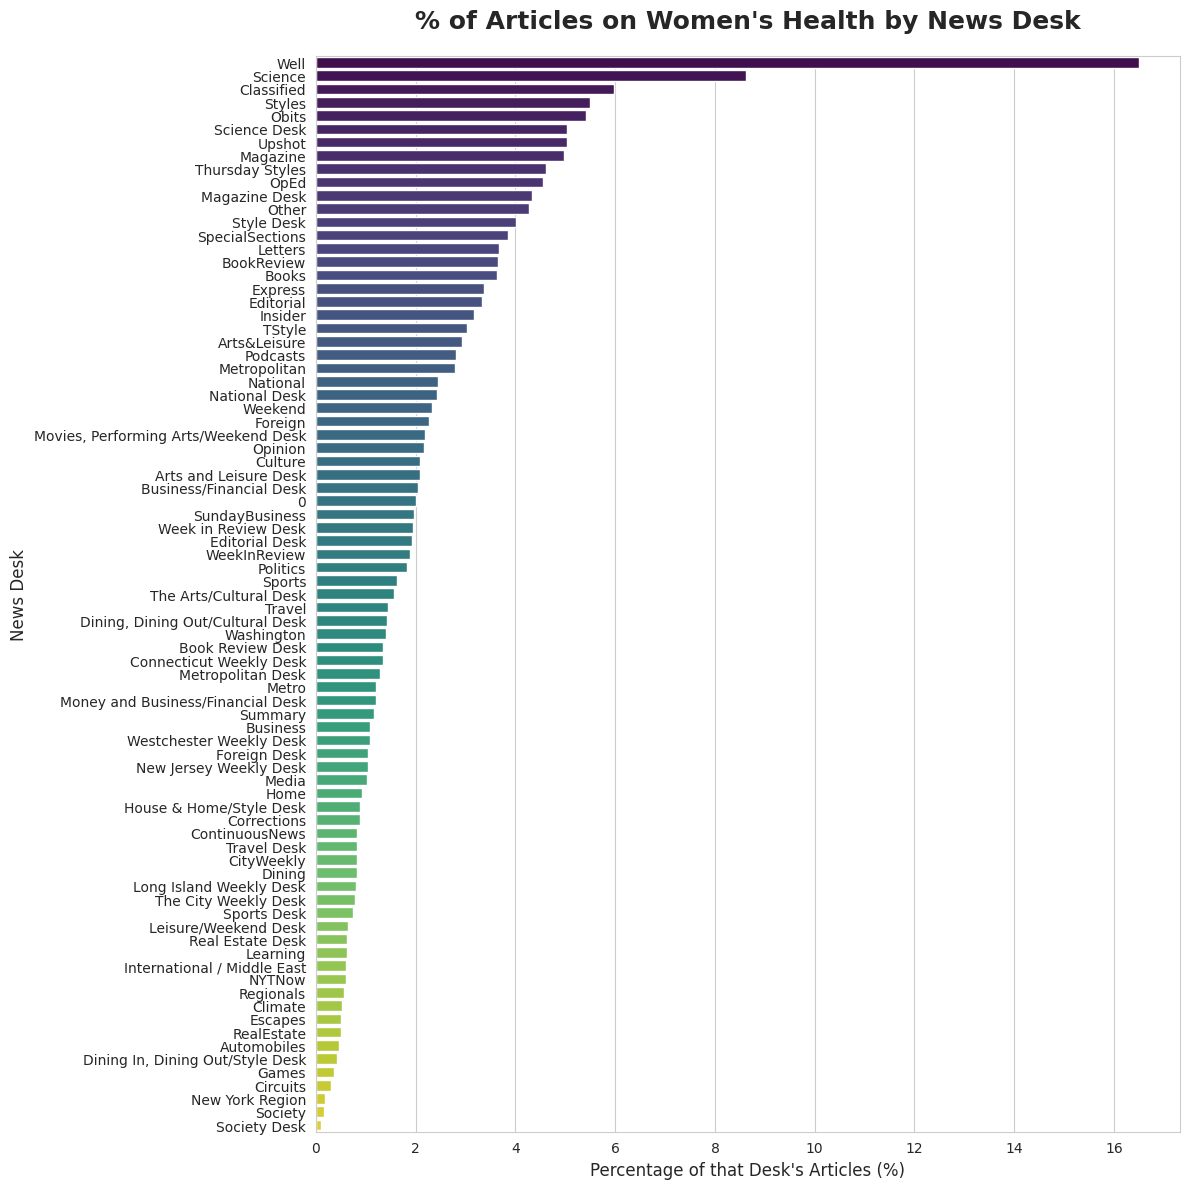

In [38]:
total_desk_counts = full_df['news_desk'].value_counts().reset_index()
total_desk_counts.columns = ['news_desk', 'total_articles']

womens_health_desk_counts = womens_health_df['news_desk'].value_counts().reset_index()
womens_health_desk_counts.columns = ['news_desk', 'womens_health_articles']

desk_summary = pd.merge(total_desk_counts, womens_health_desk_counts, on='news_desk', how='left').fillna(0)
desk_summary['womens_health_articles'] = desk_summary['womens_health_articles'].astype(int)

top_n = 80
desk_summary_to_plot = desk_summary.copy()

if len(desk_summary) > top_n:
    desk_summary_sorted = desk_summary.sort_values(by='total_articles', ascending=False)
    top_desks_df = desk_summary_sorted.nlargest(top_n, 'total_articles')
    other_desks_df = desk_summary_sorted.nsmallest(len(desk_summary) - top_n, 'total_articles')
    if not other_desks_df.empty:
        other_total = other_desks_df['total_articles'].sum()
        other_wh_total = other_desks_df['womens_health_articles'].sum()
        other_row = pd.DataFrame({
            'news_desk': ['Other'],
            'total_articles': [other_total],
            'womens_health_articles': [other_wh_total]
        })
        desk_summary_to_plot = pd.concat([top_desks_df, other_row], ignore_index=True)

desk_summary_to_plot['percentage_womens_health'] = (desk_summary_to_plot['womens_health_articles'] / desk_summary_to_plot['total_articles']) * 100
desk_summary_to_plot = desk_summary_to_plot.sort_values(by='percentage_womens_health', ascending=False)

#% of Women's Health Articles per Desk
plt.figure(figsize=(12, 12))
sns.barplot(x='percentage_womens_health', y='news_desk', data=desk_summary_to_plot, palette='viridis',hue='news_desk')
plt.title('% of Articles on Women\'s Health by News Desk', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Percentage of that Desk\'s Articles (%)', fontsize=12)
plt.ylabel('News Desk', fontsize=12)
plt.tight_layout()
plt.show()

